In [1]:
import numpy as np
import pandas as pd

# Valutare i rendimenti

Inziamo col parlare subito di quello che interessa di più il rendimento di un investimento. <br/>
Che cosa significa rendimento e come si calcola?<br/>
iniziamo subito con l'analizzare il rendimento di due investimenti in due società fittizie **Blue** e **Orange**

In [2]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [3]:
ret = prices.pct_change() * 100
ret.dropna(inplace=True)

ret.mean()

BLUE      0.999991
ORANGE    0.999986
dtype: float64

Si nota subito che il rendimento finale dell'investimento è uguale circa l'uno percento ma andiamo a vedere in un grafico i rendimenti singoli.

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

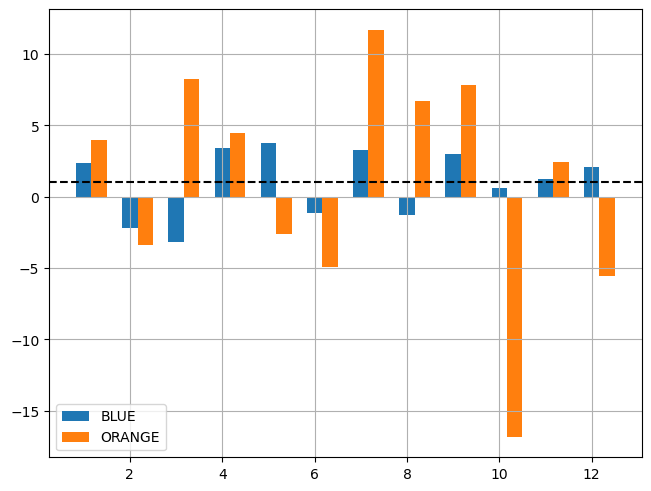

In [5]:
fig, ax = plt.subplots(layout='constrained')

columns = ret.columns

width = 1 / (len(columns) + 1)  # the width of the bars
multiplier = 0

x = ret.index

for col in ret.columns:
    offset = width * multiplier
    rects = ax.bar(x + offset,ret[col], width, label=col)
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    
plt.axhline(y=1, color='k', linestyle='--')
plt.grid()
plt.legend(loc="lower left")


Con questo piccolo test capiamo subito che il rendimento medio **non** è un buon modo per valutare il ritorno di un asset finanziario.

Un buon modo per capire come i due investimenti potrebbe essere quello di simulare un investimento supponiamo di investire sui due assett immaginari la stessa cifra supponiamo:

In [6]:
initial_investment = 1000

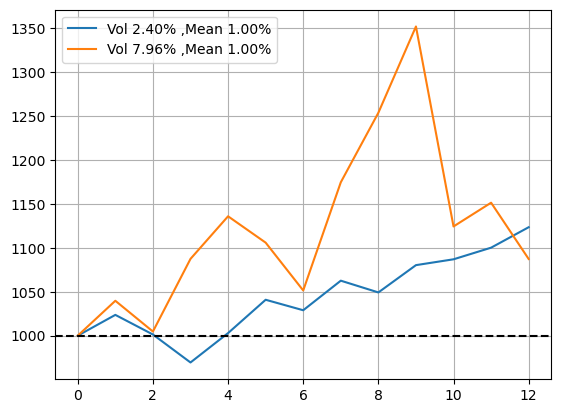

In [7]:
for col in ret.columns:
    values = [initial_investment]
    label = "Vol {0:.2f}% ,Mean {1:.2f}%".format(ret[col].std(),ret[col].mean())
    for r in ret[col].values:
        new_value = values[-1] * (1 + r/100)
        values.append(new_value)
    plt.plot(range(len(values)),values,label=label)
    
plt.axhline(y=initial_investment, color='k', linestyle='--')
plt.grid()
plt.legend(loc="upper left")
    

Dal grafico si vede che per buona parte dell'anno l'investimento arancione ha dato buoni risultati ma alla fine dell'anno è calato di molto.

Dunque abbiamo imparato una cosa importante:

**A parità di rendimento medio due investimenti possono avere rendimenti differenti!**

## Rendimento

Definiamo come rendimento la seguente formula:

$$
R_{t,t+1} = \frac{P_{t+1} - P_{t}}{P_{t}}
$$

Con $P_{t+1}$ il prezzo al tempo $t+1$ e $P_{t}$ il prezzo attuale.
La stessa formula può essere definita in modo più efficiente da un punto di vista computazione come:

$$1+r =  \frac{P_{t+1}}{P_{t}}$$

supponiamo di aver acquistato una azione a 10€ e averla venduta a 12€ avremo che

In [8]:
buy = 10
sell = 12

In [9]:
(sell - buy) / buy

0.2

In [10]:
sell / buy

1.2

se in investimento restituisce i dividendi la formula dovrebbe essere aggiustata nel modo seguente:

$$
R_{t,t+1} = \frac{P_{t+1} + D_{t+1} - P_{t}}{P_{t}} =  \frac{P_{t+1} + D_{t+1}}{P_{t}} - 1
$$

## Rendimento su più periodi

ora supponiamo di voler valutare il rendimento su più periodi come nell'immagine qui sotto:

![Rendimento](img/01-rendimento.png)

$$
R_{t,t+2} = (1 + R_{t,t+1})(1 + R_{t+1,t+2}) - 1
$$

*Esempio:* supponiamo di investire in una azione che il primo giorno rende il +10% e il secondo giorno rende il -3% non avremo un rendimento totale del 7% ma bensi: 

In [11]:
ret = [0.1,-0.03]
round(np.prod(np.array(ret) + 1) - 1,4)


0.067

il 6.7%

Ora la domanda è come confrontiamo due rendimenti ad esempio un giornaliero o un mensile e un annuale, la risposta è l'annualizzazione, cioè ragioniamo come se il rendimento fosse continuativo per un anno ad esempio:

se abbiamo un ritorno mensile dell'1% il rendimento annualizzato sarà del 12% ?, sbagliato il rendimento sarà:

In [12]:
ret = [0.01] * 12
round(np.prod(np.array(ret) + 1) - 1,4)

0.1268

bensi un 12.68%

torniamo dunque ai nostri inventimenti in Blue o Orange analizziamo il rendimento sull'intero periodo

In [13]:
retu = prices.pct_change() + 1

In [14]:
np.prod(retu) - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

Abbiamo dunque che il rendimento di Blue sarà del 12,33% mentre Orange darà un rendimento del 8,71%

# Rischio

Passiamo ora ad un altro argomento altrettanto importante, anzi quasi più importante del rendimento la volatilità.
Riprendiamo ancora l'investimento in Blue e Orange (i dei investimenti hanno la stessa media) abbiamo detto che l'investimento Orange è più "rischioso" nel senso che i valori dei rendimenti si scostano di più dalla media rispetto all'investimenti Blue.

Definiamo ora questo concetto che in statistica viene anche chiamato **Varianza**:

$$
\sigma^{2}_{R} = \frac{1}{N}\sum_{i=1}^{N}\left(R_i - \overline{R}\right)^2
$$

Con $\overline{R}$ che rappresenta la media della serie di valori dei rendimenti. 
Questo valore a volte e difficile da comprendere perciò si tende ad utilizzare la deviazione standard calcolando la radice quadrata di $\sigma^2$

$$
\sigma_{R} = \sqrt{\frac{1}{N}\sum_{i=1}^{N}\left(R_i - \overline{R}\right)^2}
$$

Non possiamo comparare direttamente la volatilità di un giorno con quella ad esempio mensile va eseguita l'operazione di annualizzazione come fatto per i rendimenti e la formula è


$$
\sigma_{ann} = \sigma_{p} \sqrt{p}
$$

ad esempio supponiamo che la volatilità giornaliera si di 

In [15]:
vol = 0.01

in un anno ci sono all'incirca 252 giorni in cui la borsa è aperta perciò

In [16]:
import math
vol * math.sqrt(252)

0.15874507866387544

Cominciamo ora nel vedere qualcosa di più serie analizziamo la volatilità del mercato azionario statunitense suddiviso tra:

* *Small Caps* società con capitalizzazione di mercato (numero di azioni * valore singolo dell'azione) relativamente bassa tra i 300 Milioni e 2 Miliardi

* *Large Caps* società con capitalizzazione superiore ai 10 miliardi di dollari

Tra il 1926 e il 2018

In [17]:
# i file aggiornati possono essere recuperati aggiornati dal sito di Fama e French 
# https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",header=0, index_col=0, na_values=-99.99)

In [18]:
me_m.index = pd.to_datetime(me_m.index, format = '%Y%m')


In [19]:
cols = ['Lo 10', 'Hi 10']
returns = me_m[cols]
returns

,Lo 10,Hi 10
1926-07-01,-1.45,3.29
1926-08-01,5.12,3.70
1926-09-01,0.93,0.67
1926-10-01,-4.84,-2.43
1926-11-01,-0.78,2.70
...,...,...
2018-08-01,2.41,2.34
2018-09-01,-1.68,0.87
2018-10-01,-10.02,-6.57
2018-11-01,-3.65,2.53


I dati sono dati in percentuale 5.4 invece che 0.045 dividiamo per 100 per ottenere il valore corretto

In [20]:
returns = returns/100

In [21]:
returns.columns = ['SmallCap', 'LargeCap']

<Axes: >

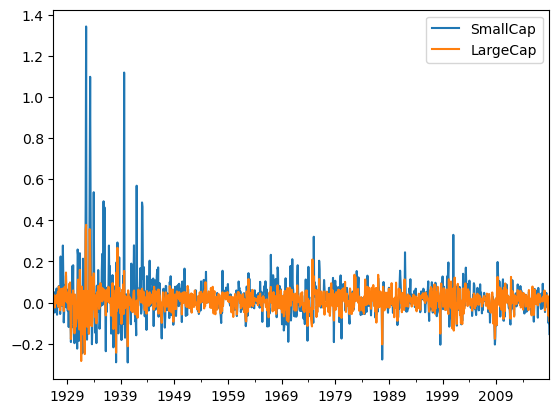

In [22]:
returns.plot()

In [23]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

Vediamo subito che l'investimento sulle **small cap** ha una volatilità maggiore, annualizziamo anche il rendimento (come detto prima non possiamo usare la media semplice) vediamo che mensilmente e annualmente il rendimento delle **small cap** è maggiore

In [24]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [25]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

A fonte di una maggiore volatilità le **small cap** hanno anche un maggior rendimento annualizzato ora la domanda è come possiamo confrontare questi due tipi di investimenti ? Possiamo provare a calcare il rapporto tra:

**Rendimento** e **Rischio**

In [26]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

Potremmo essere tentati di dire che le small cap non siano poi cosi tanto megliori delle large cap facciamo ancora un piccolo aggiustamento, calcoliamo l'eccesso (la differenza) tra il rendimento dell'investimento e un investimento "risk free" cioè un investimento con volatilità 0 di solito viene usato il tasso di interesse dei buoni del tesoro americani a brevissimo termine.

Otteniamo un indicatore importate **Sharpe ratio**

In [27]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

Ne deduciamo che l'investimento sulle small cap ha dato un risultato migliore rispetto alle large cap

## Misurare il max drawdown

Introduciamo un'altra misura del rischio, alcune persone infatti sostengono che la volatilità non è necessariamente una cosa brutta, se ci si discosta dalla media in positivo non è così male.

Proviamo a misurare il rischio come una probabilità di perdere il denaro, quello che andremo a misuare si chiama max drawdown che tradurrei come perdita massima.

Il max drawdown è la perdita massima che avresti subito se avessi avuto la sfortuna di acquistare un prodotto al suo massimo (locale) e venderlo al minimo seguente.

Per calcolare il drawdown si eseguono i seguenti passi, si parte con il calcolo dell indice patrimoniale:

In [28]:
returns.index = returns.index.to_period('M')
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


<Axes: >

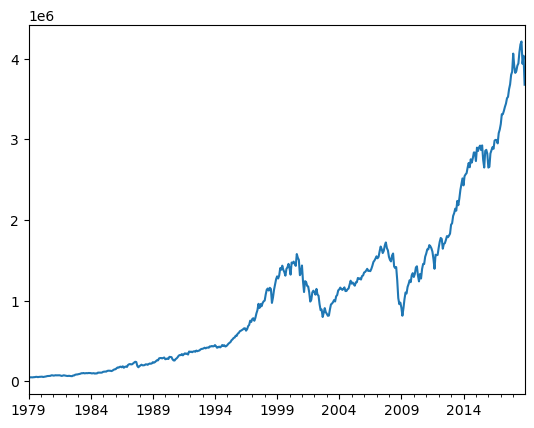

In [29]:
start = "1979"

wealth_index = initial_investment*(1+returns["LargeCap"]).cumprod()
wealth_index[start:].plot()

Si prosegue con il calcolo del massimo locale

<Axes: >

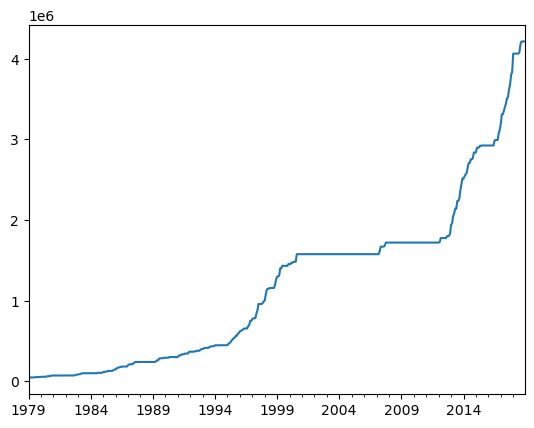

In [30]:
previous_peaks = wealth_index.cummax()
previous_peaks[start:].plot()

si prosegue con il calcolo seguente che ora risulta facile

<Axes: >

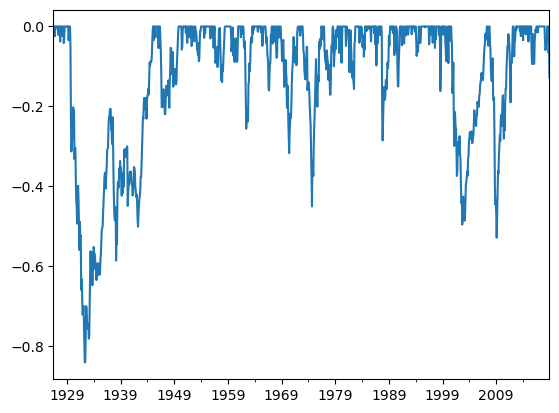

In [31]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

questo valore è molto usato in quanto misura quanto denaro senti di aver perso, ed è molto coerente ad effetti comportamentali a cui sappiamo essere soggetti.

Creiamo una funzione che calcoli il drawdown e mettiamo a confronto **Large Cap** e **Small Cap**

In [32]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})
    

In [33]:
drawdown(returns["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


Vediamo il punto in cui le **Large Cap** hanno dato il peggior rendimento 

In [34]:
drawdown(returns["LargeCap"]).min()

Wealth            405.769102
Previous Peak    1032.900000
Drawdown           -0.840038
dtype: float64

Facciamo lo stesso per le **Small Cap**

In [35]:
drawdown(returns["SmallCap"]).min()

Wealth           491.240323
Previous Peak    985.500000
Drawdown          -0.833001
dtype: float64

Ora visto che il drawdown è una misura di rischio ci chiederemmo se esiste un modo per calcolare il rendimento in rapporto al rischio che lo usi. <br/> Questo si chiama rapporto di **Calmar**.<br/> Segnaliamo un paio di cose il drawdown essendo la distanza tra due punti è molto sensibile ai valori outlier.<br/>
Altra cosa il drawdown è molto sensibile alla granularità del dato (giornaliero, settimanale, mensile), esistono delle misure migliori come **VAR** e **CVAR** che vedremo più avanti che mitigano questi problemi.

# Deviazione dalla normale

Assumiamo per semplificazione (non è sempre così) che i rendimenti siano distribuiti normalmente. In una distribuzione normale sappiamo che è poco probabile che un rendimento assuma volori alti o bassi 

In [36]:
y = np.random.normal(loc=0.0, scale=0.1, size=200)
x = np.arange(len(y))
q05 = np.quantile(y, 0.05)
q95 = np.quantile(y, 0.95)
print(q05,q95)

-0.16821034689590056 0.17637688812148924


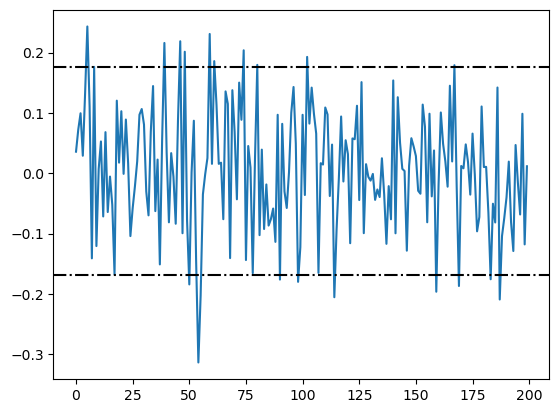

In [37]:
plt.plot(x,y)
plt.axhline(y=q05, color='k', linestyle='-.')
plt.axhline(y=q95, color='k', linestyle='-.')

nel nostro caso è poco probabile che superi in positivo o negativo il 3%.<br/> 
Nella realtà le cose sono un pochino diverse abbiamo valori grandi molto più frequentemente di una distribuzione normale, esaminiamo il rendimento giornaliero delle azioni Nike.

In [38]:
import yfinance as yf
ticker = 'NKE'
dtFrom = '2007-01-01'
dtto = '2016-12-31'
column = 'Adj Close'
nike = yf.download(ticker, start=dtFrom,end=dtto)
ret = nike[column].pct_change()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

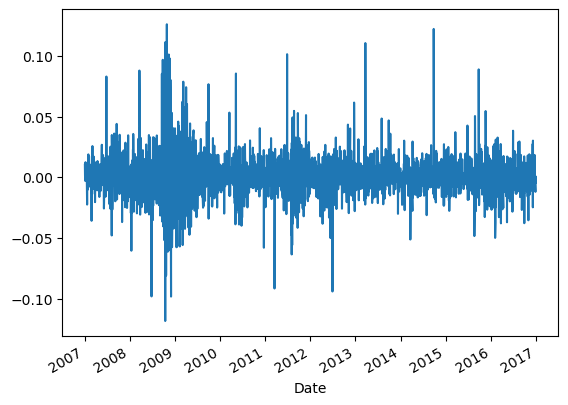

In [39]:
ret.plot()

In [40]:
mean = ret.mean()
std = ret.std()

print("Mean {0:.2f} Standard deviation {1:.2f}".format(mean,std))

Mean 0.00 Standard deviation 0.02


In [41]:
def fitline(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [42]:
def normalProbability(sample):
    n = len(sample)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    
    
    ys = np.array(sample)
    ys.sort()

    return xs, ys

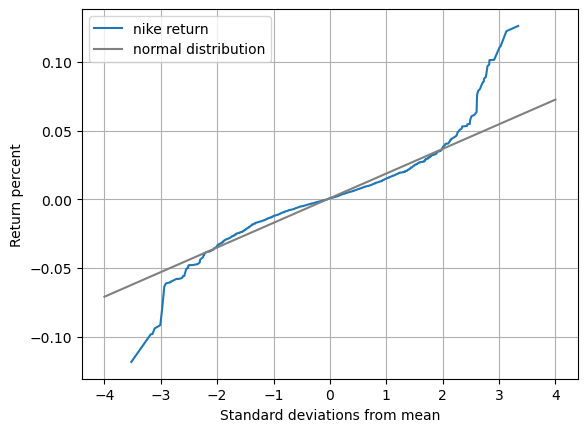

In [43]:
xs = [-4, 4]
fxs,fys = fitline(xs,mean,std)
xk, yk = normalProbability(ret)
plt.plot(xk,yk, label='nike return')
plt.plot(fxs,fys, label='normal distribution',color='gray')
plt.legend(loc='upper left')
plt.ylabel("Return percent")
plt.xlabel("Standard deviations from mean")
plt.grid(True)

Abbiamo capito che non possiamo ragionare il termini di distribuzione normale (che sottovaluta i rendimenti estremi). Dobbiamo quindi ragionare il termini di **asimmetria** e **curtosi**

### Asimmetria

Ora l'asimmetria misura quanto la distribuzione è asimmetrica, sappiamo che la normale è una campana perfettamente bilanciata, quindi ottenere un risultato sotto la media ha la stessa probabilità di ottenere un risultato sopra la media, ora se la distribuzione è sbilanciata negativamente la probabilità di ottenere un risultato sotto la media è più probabile di quella di ottenere un risultato sopra la media ovviamente vale anche il contrario.

L'assimetria è correlata a terzo momento 


![Asimmetria](img/02-skew.png)

### Curtosi

La **curtosi** è la misura dello spessore della coda della distribuzione, sappiamo che la distribuzione gaussiana ha un coda molto sottile, ciò comporta che il rischio di avere valori elevati negativi o positivi è molto basso. Abbiamo visto che per la distribuzione dei nostri rendimenti questo non vale la coda è piuttosto lunga (Fat Tail). Esiste una misura qualitativa di quanto è lunga la nostra coda la **curtosi**. 

La curtosi è collegata al quarto momento centrale, sappiamo che la distribuzione normale ha un indice di curtosi pari a tre, tornando al nostro investimento in nike vediamo che

In [44]:
ret.kurtosis()

7.938997665127084

In [45]:
ret.skew()

0.5144701961944068

L'indice di curtosi e maggiore di tre e la distribuzione è leggermente sbilanciata sul positivo in quanto il valore di asimmetria è positivo.

## Misure di rischio al ribasso

La vera preoccupazione di ogni investitore è la pobabilità di grandi perdite, tradotto la probabilità di grandi rendimenti negativi. Vogliamo andare oltre alla volatilità che è una misura simmetrica (sia nel positivo che nel negativo).

### Volatilità e semideviazione.

La semideviazione è la volatilità di un sottoinsieme dei rendimenti **sotto media** o **negativi**.<br/>
La formula sottostante definisce il concetto di **semideviazione**

$$
    \sigma_{semi} = \sqrt{\frac{1}{N} \sum_{R_t \leq \overline{R}} \left( R_t - \overline{R}  \right)^{2}}
$$

**N** è il numero di elementi che cade sotto la media

<Axes: xlabel='Adj Close', ylabel='Percent'>

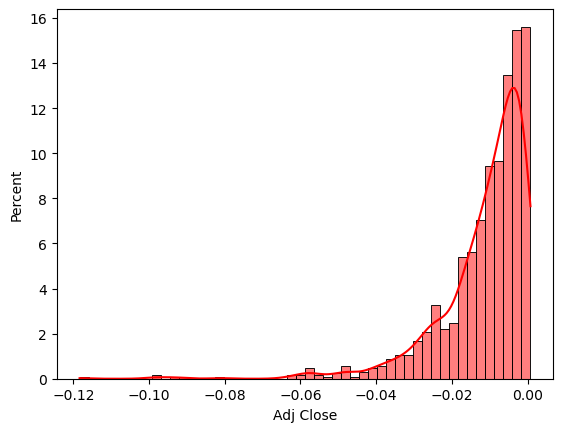

In [46]:
import seaborn as sns

fil = ret <= ret.mean()  

sns.histplot(ret[fil], bins=50, color="r", kde=True, stat="percent")

In [47]:
ret[fil].std()

0.012433351773260595

## Valore a rischio VaR

Il valore a rischio vuol cercare di capire quali sono le grandi perdite che possono spazzare via il nostro portafoglio.<br/> Partiamo con un esempio, primo passo partiamo da un intervallo di confidenza specifico ad esempio il 99%, un **VaR** dei 99% significa che vogliamo guardare tutte le peggiori perdite meno l'1% di casi estremi.<br/>
Si definisce anche un periodo di tempo di solito **un mese**, diremo dunque stima mensile del VaR al 99%.

Facciamo un esempio di calcolo supponiamo di avere un tempo di osservazione pari a 10 (per semplicità di calcolo), i rendimenti giornalieri sono:

* Giorno 1:		0.5%
* Giorno 2:	   -1.2%
* Giorno 3:		0.3%
* Giorno 4:	   -0.7%
* Giorno 5: 	1.0%
* Giorno 6:    -0.4%
* Giorno 7: 	0.8%
* Giorno 8:    -0.9%
* Giorno 9: 	0.2%
* Giorno 10:   -1.5%

Impostiamo il VaR a 95%, come primo passo ordiniamo i rendimenti dal più basso al più alto: -1.5%, -1.2%, -0.9%, -0.7%, -0.4%, 0.2%, 0.3%, 0.5%, 0.8%, 1.0%

Calcoliamo il percentile (100 - 95) prendiamo dunque il 5 percentile con 10 valori **0.05 * 10 = 0.5** va preso dunque il valore tra il primo e il secondo. 

Il VaR dunque sarà pari a: 

$$
\frac{-1.5 + -1.2} {2} = 1.35
$$


### Stimare il VaR

Ci sono essenzialmente 4 metodi per stimare il VaR:

* **Metodo 1**: Usare lo storico dei dati (metodo non parametrico)
* **Metodo 2**: Stima gaussiana parametrica del valore a rischio
* **Metodo 3**: Stima parametrica NON gaussiana del valore a rischio
* **Metodo 4**: Il metodo Cornish Fisher


Nessuno dei metodi è migliore degli altri ognuno ha un suo pro e contro.

#### Metodo basato sui rendimenti storici

Calcolo il VaR in base ai rendimenti storici, è piuttosto semplice da implementare in termini di pro o contro come vantaggio non partiamo da supposizioni, proviamo ad eseguirlo su nostro esempio 

In [52]:
ret.dropna(inplace=True)
np.percentile(ret,5)

-0.025833313420289026

In [51]:
ret

Date
2007-01-03         NaN
2007-01-04    0.010239
2007-01-05    0.001621
2007-01-08   -0.003036
2007-01-09    0.012484
                ...   
2016-12-23   -0.004411
2016-12-27   -0.011944
2016-12-28   -0.005264
2016-12-29    0.000784
2016-12-30   -0.004505
Name: Adj Close, Length: 2518, dtype: float64

#### Metodo basato sulla stima gaussiana parametrica

spiegare meglio

In [53]:
from scipy.stats import norm

In [54]:
z = norm.ppf(0.05)
z

-1.6448536269514729

In [56]:
ret.mean() + z * ret.std()

-0.02869945153674505

#### Metodo di Cornish Fisher

Spiegare

In [58]:
s = ret.skew()
k = ret.kurtosis()
z = (z + (z**2 - 1)*s/6 + (z**3 -3*z)*(k-3)/24 - (2*z**3 - 5*z)*(s**2)/36)

In [59]:
z

-1.3939676860041263

In [60]:
ret.mean() + z * ret.std()

-0.024202729126728738

CVaR